In [17]:
import neuromancer
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from scipy.integrate import solve_ivp

print("success")

success


# Load and create data

In [13]:
def budworm_ode(t,x,r,k):
    return r*x*(1-x/k) - x**2 / (1+x**2)


def simulate_steady_state(k_vals, x0):
    t_span = [0,100]
    t_eval = [t_span[-1]]
    r=0.56
    x_vals = []
    x_curr = x0
    for k in tqdm(k_vals):
        sol = solve_ivp(budworm_ode, t_span=t_span, y0=[x_curr],args = (r,k,), t_eval=t_eval)
        x_curr = sol.y[0,-1]
        x_vals.append(x_curr)
    return np.array(x_vals)

In [67]:
from sympy import symbols, Eq, solve, simplify

r, k = symbols('r k', positive=True)
a = r/k
b = -r
c = (k+r)/k
d = -r
p = (3*a*c-b**2) / (3*a**2)
q = (2*b**3 - 9*a*b*c+27*a**2*d) / (27*a**3)

D = - (4*p**3 + 27*q**2)
D = simplify(D)


D_fixed = D.subs(r, 0.56)
k1, k2 = solve(Eq(D_fixed, 0), k)
print(k1,k2)

k_vals = np.linspace(float(k1)-1, float(k2)+1, 201) 

6.44569072482332 9.93441120446710


In [73]:
x0 = 1

k_start = k_vals[0]
k_end = k_vals[-1]
n_points = 250

k_increase = np.linspace(k_start,k_end, n_points)
k_decrease = np.linspace(k_increase[-1],k_start,n_points)

k_increase2 = np.linspace(k_decrease[-1],k_end,n_points)
k_decrease2 = np.linspace(k_increase2[-1],k_start,n_points)


In [74]:
x_increase = simulate_steady_state(k_increase,x0=x0)
x_decrease = simulate_steady_state(k_decrease, x0=x_increase[-1])

x_increase2 = simulate_steady_state(k_increase2,x0=x_decrease[-1])
x_decrease2 = simulate_steady_state(k_decrease2,x0=x_increase2[-1])

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

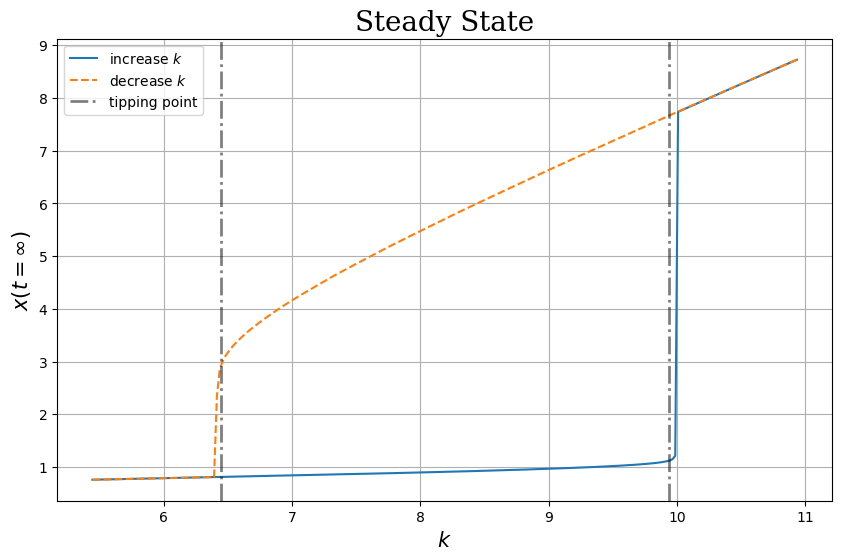

In [76]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(k_increase,x_increase, label=r'increase $k$')
ax.plot(k_decrease, x_decrease, linestyle='--',label=r'decrease $k$')
ax.axvline(k1, linestyle='-.', c = 'black', alpha=0.5, label='tipping point',lw=2)
ax.axvline(k2, linestyle='-.', c = 'black', alpha=0.5,lw=2)

ax.set_xlabel(r"$k$", size = 15)
ax.set_ylabel(r"$x(t=\infty)$",size=15,)

ax.set_title("Steady State", family = 'serif', size=20)

ax.grid(True)
ax.legend(loc = 'upper left')
plt.show()

In [144]:
X = np.hstack((x_increase,x_decrease,x_increase2,x_decrease2))
K = np.hstack((k_increase,k_decrease,k_increase2,k_decrease2))

X = np.hstack((X,X))
K = np.hstack((K,K))
train_idx = np.arange(0,len(X),10)
X_train = X[train_idx]
K_train = K[train_idx]

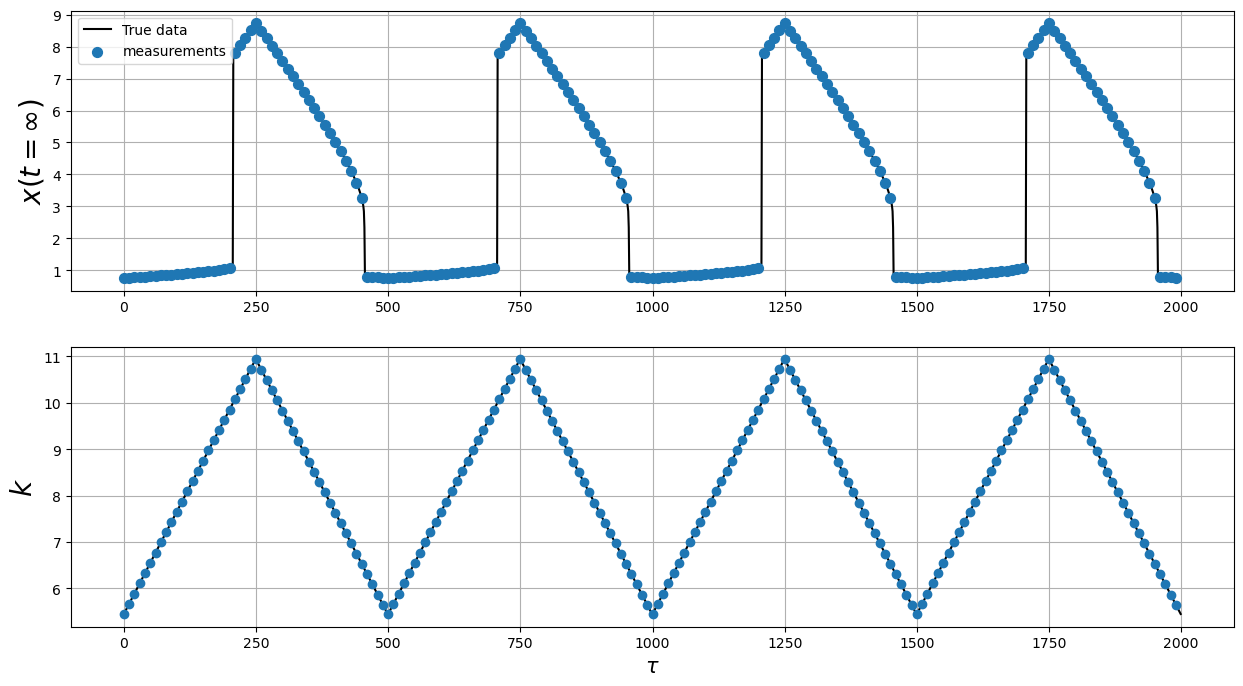

In [147]:
fig, ax = plt.subplots(2,1,figsize=(15,8))
ax[0].plot(X,c='black', label='True data')
ax[0].scatter(train_idx,X_train,marker='o',lw=1,zorder=5,s=50,label="measurements")
ax[0].set_ylabel(r"$x(t=\infty)$",size=20,)
ax[0].grid(True)
ax[0].legend()


ax[1].plot(K,c='black')
ax[1].scatter(train_idx,K_train,zorder=5)
ax[1].set_ylabel(r"$k$",size=20)
ax[1].set_xlabel(r"$\tau$",size=15)
ax[1].grid(True)


plt.show()

## Format for Neuromancer

(200,)